## Reconstruction of input vector via Gradient Descent


In this notebook, we will show how to reconstruct the input `x` when disturbing the output `y` and using the weight `W` and the bias `b`. We consider a linear activation, with a forward pass:

`y = Wx + b`

Once we trained the model and get the optimized `W` and `b`, instead of predict the output `y` from the input `x`, we propose a different approach that enables to study the effect of the output on the input. For example, what value of `x` will generate the ouput value `y0`.

Here is the procedure we use - let's consider an output value `y0` and let's predict the value `x0` where :

`y0 = Wx0 + b`

Taking `W` and `b` as fixed parameters, obtained from the training process. `x`is the only fitting parameter.

1) We calculate the cost as: 

`cost_ = ( y0 - ypred)**2`

where `ypred` is the predicted value when using a value `x`.


2) We then calculate the gradient:

`d cost/ dx`


3) and update the value of x: 

`x -= lr * grad_x`
 


In [4]:
#import required library
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as K
import tensorflow as tf
K.clear_session()
from matplotlib import pyplot as plt

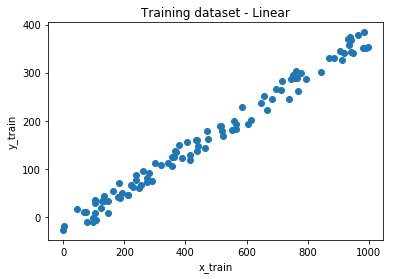

In [5]:
#Build dataset
x_train = np.random.uniform(low=0, high=1000, size=(100, 1))
y_train = np.array([0.4 * i -50 * np.random.random() for i in x_train])

#Visualize data
plt.scatter(x_train, y_train)
plt.title("Training dataset - Linear")
plt.xlabel("x_train")
plt.ylabel("y_train")
plt.show()

In [6]:
#Train the a simple model to fit the dataset and extract W and bias

model = Sequential()
model.add(Dense(units=1, input_shape=(1, )) )
# now the model will take as input arrays of shape (*, 1)
# and output arrays of shape (*, 1)
model.compile(loss="mse", optimizer="adam")
model.fit(x_train, y_train, epochs=100000, batch_size=100, verbose=0)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


Weight 0.40204986929893494 | Bias: -25.4401912689209


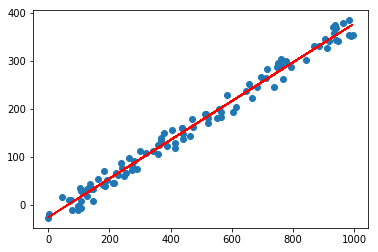

In [7]:
# Plot the data and the best fit 

for layer in model.layers:
    weight = layer.get_weights()[0][0,0]
    bias = K.get_value(layer.bias[0])
    print("Weight {} | Bias: {}".format(weight, bias) )

x_test =  x_train  
pred_y_test = model.predict(x_test)
plt.scatter(x_train, y_train)
plt.plot(x_test, pred_y_test, c="r")
plt.show()

## Reconstruction of input `x0`

Let's see what the input `x0` is when we fix the output `y0=100`.

1) Initialize `x` to be 1
2) Compute forward pass: `y = Wx + b`
3) Calculate the gradient
4) Update the value of `x = x - lr * grad_x`

We iterate this update multiple times until convergence.

Iteration: 0 | x value: [[ 41.21725464]]
Iteration: 5 | x value: [[ 176.50506592]]
Iteration: 10 | x value: [[ 244.20111084]]
Iteration: 15 | x value: [[ 278.07522583]]
Iteration: 20 | x value: [[ 295.02532959]]
Iteration: 25 | x value: [[ 303.50689697]]
Iteration: 30 | x value: [[ 307.75097656]]
Iteration: 35 | x value: [[ 309.87463379]]
Iteration: 40 | x value: [[ 310.93728638]]
Iteration: 45 | x value: [[ 311.46905518]]
Iteration: 50 | x value: [[ 311.73513794]]
Iteration: 55 | x value: [[ 311.86825562]]
Iteration: 60 | x value: [[ 311.93487549]]
Iteration: 65 | x value: [[ 311.96820068]]
Iteration: 70 | x value: [[ 311.98483276]]
Iteration: 75 | x value: [[ 311.9932251]]
Iteration: 80 | x value: [[ 311.99737549]]
Iteration: 85 | x value: [[ 311.9994812]]
Iteration: 90 | x value: [[ 312.00054932]]
Iteration: 95 | x value: [[ 312.00106812]]
Iteration: 100 | x value: [[ 312.00131226]]
Iteration: 105 | x value: [[ 312.00146484]]
Iteration: 110 | x value: [[ 312.00146484]]
Iteration: 11

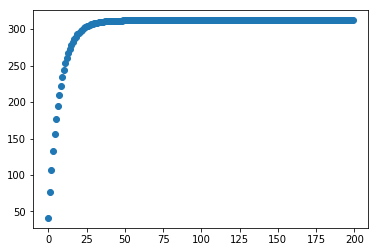

In [8]:
def total_loss(y_mod, y_pred):
    cost_ = K.square(y_mod - y_pred)
    return cost_

#
x = np.array([1.])
x = x.reshape( (1, 1) )
w = weight.reshape((1, 1))
bias = bias.reshape((1, 1))
y0 = np.array([[100.]])
x_tensor = tf.convert_to_tensor(x, np.float32)
w_tensor = tf.convert_to_tensor(w, np.float32)
b_tensor = tf.convert_to_tensor(bias, np.float32)

y0_tensor = tf.convert_to_tensor(y0, np.float32 )
x_summary = []
n_iter = 200
for iteration in range(n_iter):
    y_pred = K.dot(x_tensor, w_tensor) + b_tensor
    cost_ = total_loss(y0_tensor, y_pred)
    grads = K.gradients(cost_, x_tensor)[0]
    loss = K.mean(cost_)
    lr = K.variable(0.4)
    x_tensor -= lr * grads
    x_summary.append(K.get_value(x_tensor)[0,0])
    if (iteration % 5 == 0) or (iteration==n_iter-1):
        print("Iteration: {} | x value: {}".format(iteration, K.get_value(x_tensor)))

    x0 =  K.get_value(x_tensor)[0, 0]


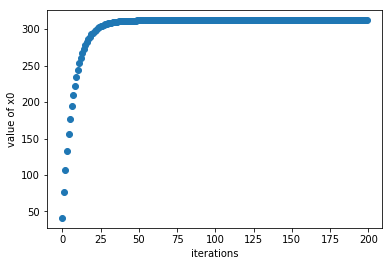

In [9]:
plt.scatter( np.arange(0, n_iter, 1 ), x_summary)
plt.xlabel("iterations")
plt.ylabel("value of x0")
plt.show()

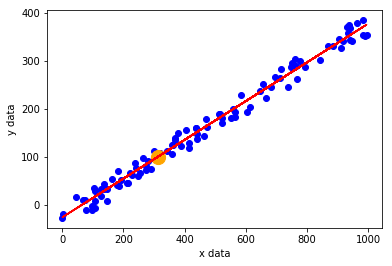

In [12]:
plt.scatter(x_train, y_train, c="blue")
plt.plot(x_test, pred_y_test, c="r")
plt.scatter([x0], [y0[0,0]], c='orange', s=200)
plt.xlabel("x data")
plt.ylabel("y data")
plt.show()